Net(
  (fc1): Linear(in_features=6, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=6, bias=True)
  (relu): ReLU()
  (tanh): Tanh()
)
[Parameter containing:
tensor([[-0.2390, -0.3721, -0.0486,  0.1332,  0.3116,  0.2828],
        [ 0.0739,  0.3883, -0.1513,  0.2449,  0.3878,  0.3386],
        [ 0.2720, -0.0888,  0.0547,  0.1519, -0.3179, -0.1098],
        [-0.1024,  0.2247,  0.2232,  0.0764, -0.3195, -0.2562],
        [-0.0601,  0.3946,  0.2268,  0.0515, -0.3235, -0.2963],
        [ 0.3607, -0.3154, -0.0101, -0.1256, -0.1040, -0.1193],
        [ 0.0802,  0.1021,  0.0348,  0.1127, -0.3405, -0.0731],
        [ 0.0362,  0.2775,  0.0793, -0.0122, -0.3564,  0.1758]],
       requires_grad=True), Parameter containing:
tensor([ 0.3386, -0.2999, -0.0679, -0.0333, -0.0755,  0.3884, -0.2893,  0.0974],
       requires_grad=True), Parameter containing:
tensor([[-0.1263, -0.2202,  0.2792, -0.2889,  0.0108, -0.1699, -0.32

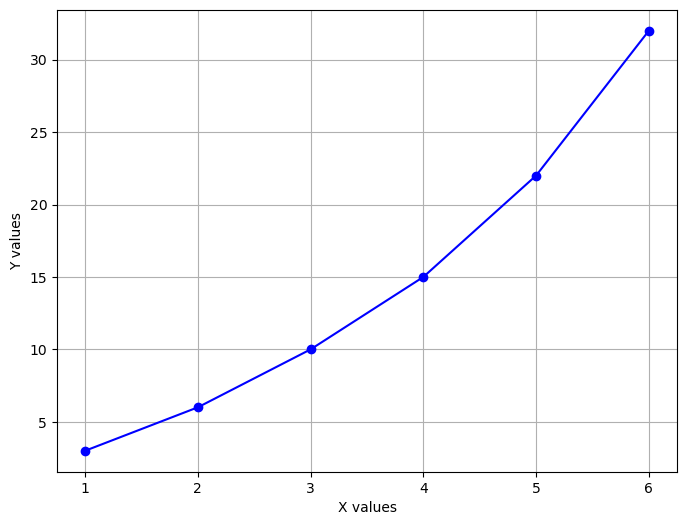

tensor([[1., 2., 3., 4., 5., 6.]])
tensor([[ 3.,  6., 10., 15., 22., 32.]])


In [26]:
### Training with fancier version ###

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module): ## nn.Module class is used
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(6,8)  # in dim, out dim
        self.fc2 = nn.Linear(8,8)
        self.fc3 = nn.Linear(8,6)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
    def forward(self, x):
        #x = self.relu(self.fc1(x))     # ReLU mgith hide the information of negative value
        #x = self.relu(self.fc2(x))
        #x = self.fc3(x)
        #x = self.relu(self.fc3(x))
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.fc3(x)                 # The last layer should not apply any function so that the network can learn freely
        #x = self.relu(self.fc3(x))
        return x

net = Net()

print(net)
print(list(net.parameters())) # parameters are randomized


#def criterion(out, label):
#    return (label - out)**2
criterion = nn.MSELoss()


#optimizer = optim.SGD(net.parameters(), lr=1e-2)
optimizer = optim.Adam(net.parameters(), lr=1e-3)


data = [(1.0,3.0), (2.0,6.0), (3.0,10.0), (4.0,15.0), (5.0,22.0), (6.0,32.0)]
dataset = torch.tensor([[d[0] for d in data]], dtype=torch.float)
label = torch.tensor([[d[1] for d in data]], dtype=torch.float)
hist = []

# Split data into x and y
x_values, y_values = zip(*data)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True)
plt.show()

print(dataset)
print(label)

In [28]:
for epoch in range(10000): # 0 - 19
    #for i, current_data in enumerate(data):
        #X, Y = current_data
        #X, Y = torch.FloatTensor([X]), torch.FloatTensor([Y])
    optimizer.zero_grad()   
    outputs = net(dataset)
    loss = criterion(outputs, label)
    loss.backward()
    hist.append(loss.detach())
    optimizer.step()    ## This line is equivalent to "W = W - lr* W.grad"
    print("Epoch {} - loss: {}".format(epoch, loss))


### Test the trained network ###            
for i, current_data in enumerate(dataset):
    #X, Y = current_data
    #X, Y = torch.FloatTensor([[X]]), torch.FloatTensor([[Y]])  
    #out = net(torch.FloatTensor(X))  
    out = net(current_data)
    print("when x = {}, y = {}".format(X, out))
    

Epoch 0 - loss: 43.79353713989258
Epoch 1 - loss: 43.74771499633789
Epoch 2 - loss: 43.70195007324219
Epoch 3 - loss: 43.656219482421875
Epoch 4 - loss: 43.61053466796875
Epoch 5 - loss: 43.56489181518555
Epoch 6 - loss: 43.51927185058594
Epoch 7 - loss: 43.47372055053711
Epoch 8 - loss: 43.42818069458008
Epoch 9 - loss: 43.3826904296875
Epoch 10 - loss: 43.337249755859375
Epoch 11 - loss: 43.29182815551758
Epoch 12 - loss: 43.246463775634766
Epoch 13 - loss: 43.201141357421875
Epoch 14 - loss: 43.15585708618164
Epoch 15 - loss: 43.110595703125
Epoch 16 - loss: 43.06538391113281
Epoch 17 - loss: 43.02021408081055
Epoch 18 - loss: 42.97508239746094
Epoch 19 - loss: 42.92999267578125
Epoch 20 - loss: 42.88493728637695
Epoch 21 - loss: 42.839935302734375
Epoch 22 - loss: 42.79495620727539
Epoch 23 - loss: 42.75001907348633
Epoch 24 - loss: 42.70512771606445
Epoch 25 - loss: 42.6602783203125
Epoch 26 - loss: 42.61545944213867
Epoch 27 - loss: 42.570682525634766
Epoch 28 - loss: 42.52595138

In [65]:
X

tensor([6.])

In [12]:
for epoch in range(20):
    print(epoch)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [47]:
W = torch.tensor([1.0], requires_grad=True)
W = W*2
label = 1.0
loss = W*5 - label 
loss.backward()
#W.grad